# Ford GOBike System

## I choose ford GoBike system data-set , which includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

**A-Assessing Data**

In [3]:
bike_ford_df=pd.read_csv('201902-fordgobike-tripdata.csv')
#df=pd.read_csv('/content/drive/MyDrive/fordbike.csv', sep=', ', delimiter=None,  header='infer', names=None, 
#                index_col=None, usecols=None, squeeze=False, engine=None,)

In [4]:
bike_ford_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


**B- Data exploeration**

In [5]:
bike_ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
bike_ford_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
most_missing_cols = set(bike_ford_df.columns[bike_ford_df.isnull().mean() > 0.50])

In [8]:
most_missing_cols

set()

**C- Data Cleaning**

In [9]:
bike_ford_df['member_gender'].fillna('Other',inplace=True)
bike_ford_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender                 0
bike_share_for_all_trip       0
dtype: int64

i fill all unknown gender to new class (unknown) 

In [10]:
bike_ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [11]:
bike_ford_df['member_birth_year'].fillna(bike_ford_df['member_birth_year'].mode(),inplace=True)

In [12]:
bike_ford_df.dropna(0,inplace=True)
bike_ford_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

now we handle all missing data

In [13]:
#add new column member age
bike_ford_df['member_age']=2021 - bike_ford_df['member_birth_year']

make a new attribute member age

In [14]:
bike_ford = bike_ford_df.copy()
bike_ford['start_time'] = pd.to_datetime(bike_ford['start_time'])
bike_ford['end_time'] = pd.to_datetime(bike_ford['end_time'])


In [15]:
bike_ford['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [16]:
bike_ford['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [17]:
bike_ford['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [18]:
bike_ford.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,38.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,32.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,33.0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,29.0
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,25.0


**D- Data Visualization**

**1- Univariate**

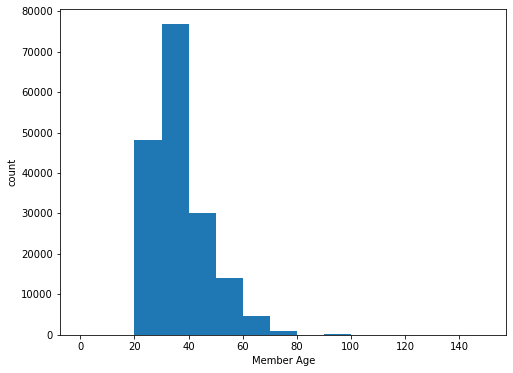

In [19]:
plt.figure(figsize=[8, 6])
bins = np.arange(0, bike_ford['member_age'].max()+10, 10)
plt.hist(bike_ford['member_age'], bins=bins);
plt.xlabel('Member Age');
plt.ylabel('count');

here we found outlier values , greater than 80 so we will remove that out;iers


In [20]:
bike_ford = bike_ford.query('member_age <= 80')


Remove all outliers in member_age attribute

In [21]:


bike_ford['duration_minute'] = bike_ford['duration_sec']/60

bike_ford['start_date'] = bike_ford.start_time.dt.strftime('%Y-%m-%d')
bike_ford['start_hour'] = bike_ford.start_time.dt.strftime('%H')
bike_ford['start_week'] = bike_ford.start_time.dt.strftime('%A')
bike_ford['start_month'] = bike_ford.start_time.dt.strftime('%B')


make new attributes show start trip (hour,day,month)

In [22]:
bike_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_date,start_hour,start_week,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,37.0,869.750000,2019-02-28,17,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,49.0,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,32.0,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,47.0,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,62.0,29.883333,2019-02-28,23,Thursday,February


In [48]:
def count_plot_2d(X,Hue):
    sb.countplot(data=bike_ford,x=X,hue=Hue);
    plt.xlabel(X)
    plt.ylabel('Count')

In [27]:
base_color = sb.color_palette('colorblind')[0]
def count_plot(X):
    base_color = sb.color_palette('colorblind')[0]
    sb.countplot(data=bike_ford, x=X,color=base_color, order = bike_ford[X].value_counts().index);
    plt.xlabel(X);
    plt.ylabel('Count');


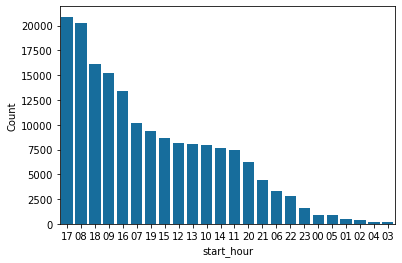

In [28]:
count_plot('start_hour')

Text(0, 0.5, 'Count')

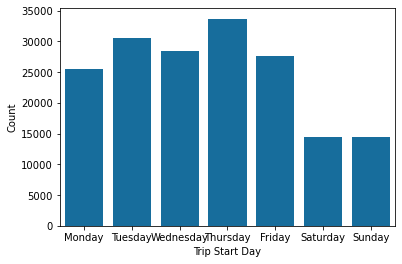

In [29]:

day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday = pd.api.types.CategoricalDtype(ordered=True, categories=day)
bike_ford['start_week'] = bike_ford['start_week'].astype(weekday)
sb.countplot(data=bike_ford,x='start_week',color=base_color);
plt.xlabel('Trip Start Day')
plt.ylabel('Count')

large amount of trips started in Thursday and Tuesday

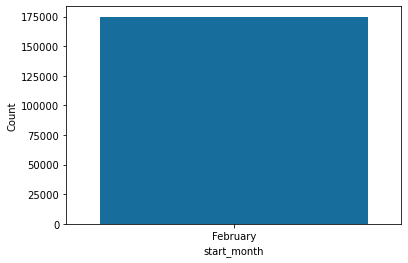

In [30]:
count_plot('start_month')

**2- Bivariate**

**2.1 -Relation between member gender and bike share all trip attributes**

In [31]:
# is bike share attribute depend on member gender
ct_counts=bike_ford.groupby(['member_gender','bike_share_for_all_trip']).size()
plt.rcParams['figure.figsize'] = 8, 6
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='member_gender',columns='bike_share_for_all_trip',values='count')
ct_counts

bike_share_for_all_trip,No,Yes
member_gender,,
Female,37197,3568
Male,117264,13076
Other,2996,648


i choose heat map plot(clustered plot) because member gender is qualitative and bike share for all trip is qualitative.


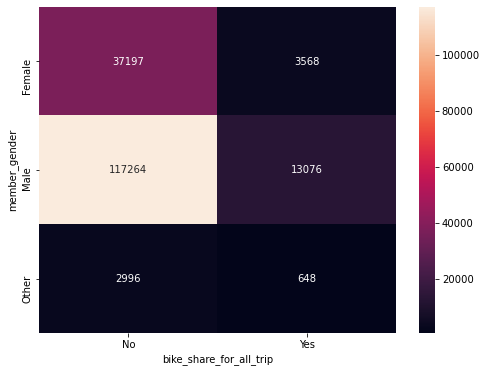

In [32]:
sb.heatmap(ct_counts,annot=True,fmt='d');

**2.2- relation between member_age and bike share for all trip**

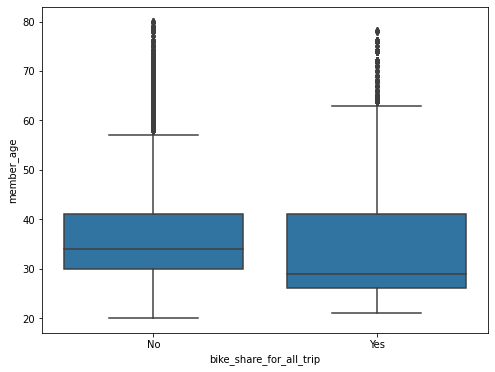

In [33]:
#relation between age and bike share
base_color=sb.color_palette()[0]
sb.boxplot(data=bike_ford,x='bike_share_for_all_trip',y='member_age',color=base_color);

members who share have less median age(less than 30), thats mean youth member share more than other 

**2.3- Relation between user type and duration**





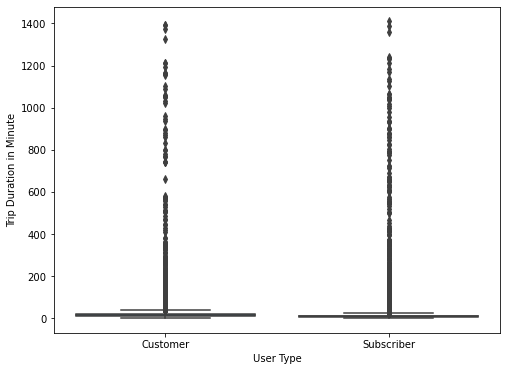

In [34]:
# trip duration vs user_type

sb.boxplot(data=bike_ford, x='user_type', y='duration_minute', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

there are a lot of outliers that make visualize that relation hard , so i will remove any outlier using IRQ , then try to visualize it

In [35]:
bike_ford['duration_minute'].describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_minute, dtype: float64

In [36]:
Q1=1.016
Q2=5.3833333
Q3=8.5166667
IRQ=Q3-Q1
max=Q3+(1.5*IRQ)
bike_ford_type=bike_ford.query('duration_minute <='+str(max))

i choose box plot because user type is qualitative and duration is quantitative.


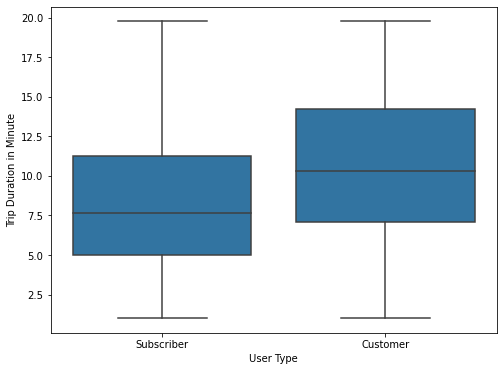

In [37]:

sb.boxplot(data=bike_ford_type, x='user_type', y='duration_minute', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

now we see the median of subscriber user are 7.5 minute/trip, and for customer above 10 , customers spend more minutes in trip than subscribers

**2.4- relation between gender and duration**

i choose box plot because gender is qualtative,duration is quantitative 

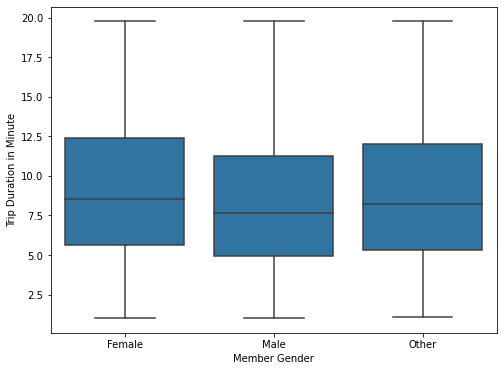

In [38]:
#gender vs duration

sb.boxplot(data=bike_ford_type, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Member Gender');
plt.ylabel('Trip Duration in Minute');

Female have median above Male in Trip/minute ratio , Female make large number of minutes in trips than male

**2.5- relation between start hour attribute and user type**

i choose Bar plot

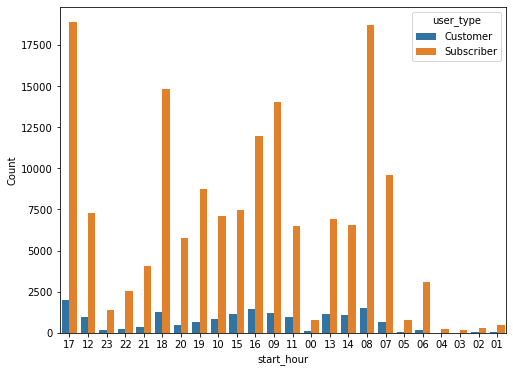

In [49]:
count_plot_2d('start_hour','user_type')

as we see number of subscriber large than customer (another relation represent that), also in that relation we see (time from 05 to 01) number of trips less than in the middle of the day , we see subscriber make large number of trips (between 17 and 8) 

**2.6- relation between start _day and user type**

i choose bar plot because two attributes are qualtative

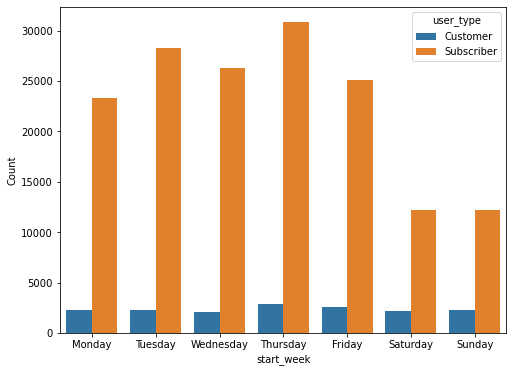

In [51]:
count_plot_2d('start_week','user_type')

**2.7- relation between start hour and Gender**

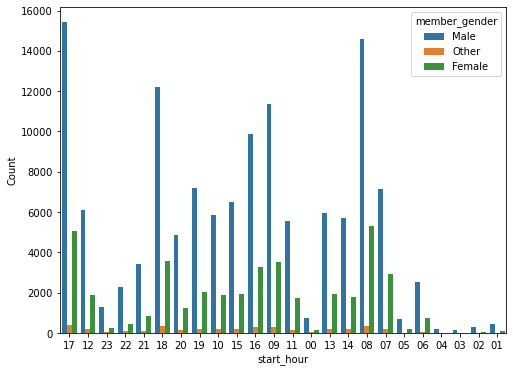

In [52]:
count_plot_2d('start_hour','member_gender')

**2.8- relation between start _day and Gender**

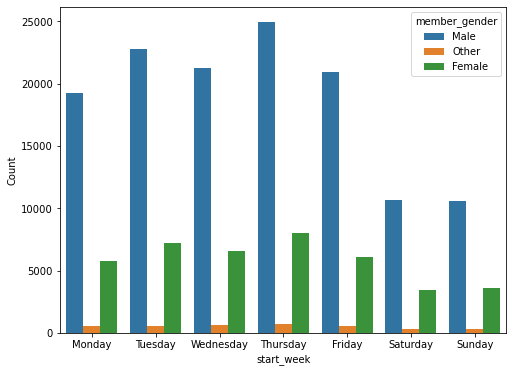

In [54]:
count_plot_2d('start_week','member_gender')

**2.9-relation between member age and user type**

Text(0, 0.5, 'Member Age')

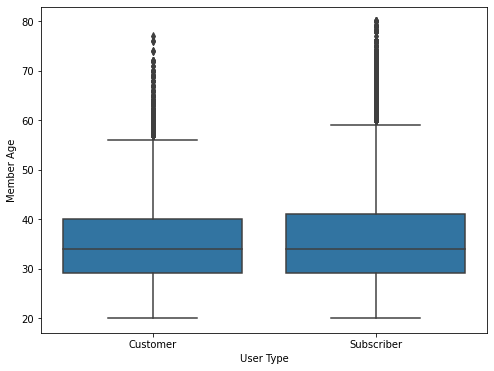

In [43]:
sb.boxplot(data=bike_ford,x='user_type',y='member_age',color=base_color);
plt.xlabel('User Type')
plt.ylabel('Member Age')

median of ages in two clasess subscriber and customer almost same , and two classes have the same age stage members, but the max age in subscriber class larger than customer

**2.10- relation between start day and trip duration**

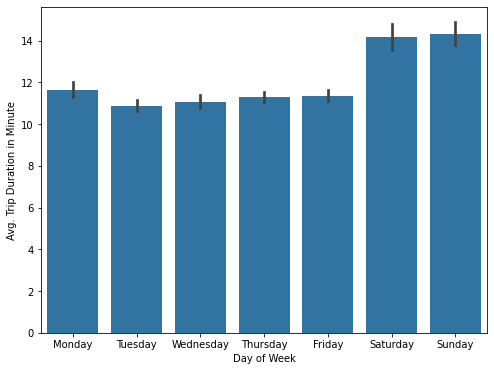

In [44]:
sb.barplot(data=bike_ford, x='start_week', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');


weekend have greatest number of minutes per trip , so member prefered making trips in weekend.

**2.11- relation between start hour and Trip Duration**

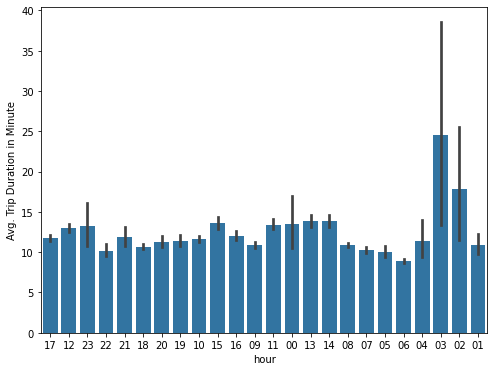

In [45]:
sb.barplot(data=bike_ford, x='start_hour', y='duration_minute', color=base_color);
plt.xlabel('hour');
plt.ylabel('Avg. Trip Duration in Minute');


members whoes starting at 3 and 2 PM make large number of minutes per trip

**3- Multivariate Visulaization:**

**3.1- Relation between average duration per trip and start day , with user type**

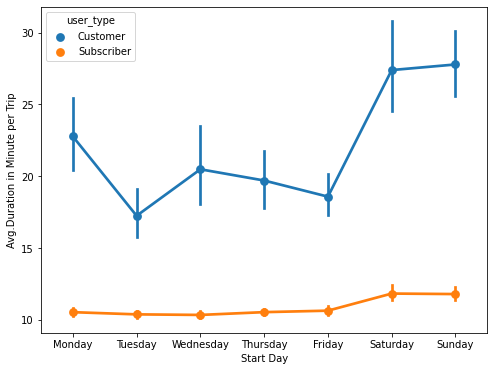

In [46]:
sb.pointplot(data=bike_ford, x='start_week', y='duration_minute', hue='user_type');
plt.xlabel('Start Day');
plt.ylabel('Avg.Duration in Minute per Trip');

Weekend effect , as we see in sunday and saturday the greatest number of minutes per trip , and customer members have largest minutes than subscriber in  weekend and all the week  

**3.2- relation betweem avg Duration , Age and user type**

C:\Users\mosta\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


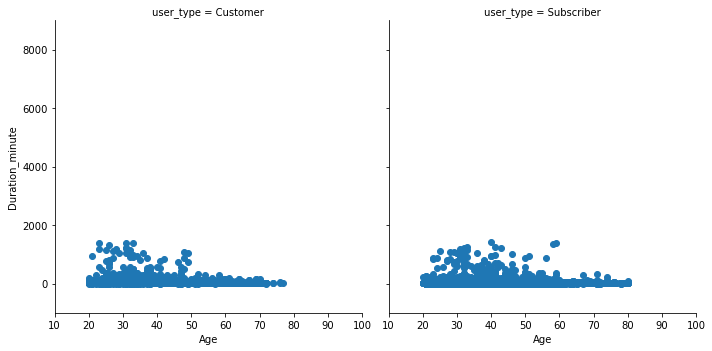

In [47]:
user_type = sb.FacetGrid(data = bike_ford, col = 'user_type', col_wrap = 2, size = 5,xlim = [10, 100], ylim = [-1000, 9000])
user_type.map(plt.scatter, 'member_age', 'duration_minute', alpha= 1)
user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_minute')
plt.show()

as we see customers who's age between 20 and 30 have greater avg duration per trip than subscriber

**E- Conclusion and important Relations:**

#### There are alot of relation that help us to understand a lot of things , and make us answer some question like which gender have largest number of trips and minuters per trip?
Here i will show some conclusion and helpful relations with some comments:
## 1- Gender and Avg. duration in trip:
Female make largest number of minuter per trip , and that doesn't mean number of females larger than male or other. 
## 2- Start day vs. user type, and duration vs user type:
subscriber have largest number in trip start relation in all days , but when we take a look on duration and user type , we can see customer make largest number of minuter per trip , thats mean subscriber start a lot of trips but never long trips they prefered shortest one.
## 3-which hour that member start trip make him have largest duration per trip?
members whoes starting at 3 and 2 PM make large number of minutes per trip
### 4-which day that member start on it trip and also make large duration in trip ?  
Weekend effect , as we see in sunday and saturday the greatest number of minutes per trip , and customer members have largest minutes than subscriber in  weekend and all the week  
### 5- which age stage that share all the trip?
we see the stage from 27 to 40 have highest sharing ratio 
### 6- which day members prefered to start their trips ?
Thursday and Tuesday ,but that two days have lowest number of minutes per trip, that mean members start in that day short trips


In [ ]:
!jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl --post serve